In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numba

colors = sns.color_palette("colorblind", 20, desat = .8)
sns.set_palette(colors)
sns.color_palette()

[(0.07333333333333336, 0.43098039215686273, 0.6286274509803921),
 (0.7854901960784314, 0.5376470588235294, 0.1047058823529412),
 (0.06901960784313721, 0.5584313725490196, 0.42352941176470593),
 (0.751764705882353, 0.37843137254901965, 0.08352941176470585),
 (0.7670588235294117, 0.5035294117647059, 0.7168627450980389),
 (0.7509803921568626, 0.5721568627450979, 0.42156862745098034),
 (0.9545098039215686, 0.7160784313725489, 0.8823529411764707),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.8529411764705883, 0.8184313725490195, 0.27254901960784306),
 (0.3949019607843137, 0.6898039215686274, 0.856078431372549),
 (0.07333333333333336, 0.43098039215686273, 0.6286274509803921),
 (0.7854901960784314, 0.5376470588235294, 0.1047058823529412),
 (0.06901960784313721, 0.5584313725490196, 0.42352941176470593),
 (0.751764705882353, 0.37843137254901965, 0.08352941176470585),
 (0.7670588235294117, 0.5035294117647059, 0.7168627450980389),
 (0.7509803921568626, 0.5721568627450979, 0.42156862745098034),
 (0.9545098039215686, 0.7160784313725489, 0.8823529411764707),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.8529411764705883, 0.8184313725490195, 0.27254901960784306),
 (0.3949019607843137, 0.6898039215686274, 0.856078431372549)]

# 5.3


(a)

The convicing rates are proportional to $R$ and $D$ becuase the number of the people getting convinced, are proportional to the current number of both republicans and democratss. Quite simply put: if there is a lot of republicans who can convince someone to switch party, they will have an easier time doing it. On the other hand; if there is not that many to convince, the convincing rate will slow down.

In [3]:
# (b)

@numba.njit
def gillespie_rd(r, d, max_steps):
    step = 0
    d_list = [d]
    r_list = [r]

    
    while step < max_steps:
        
        # Convincing rates
        rand_r = 0.1 * d
        rand_d = 0.1 * r
        dem_to_rep = 0.01 * d * r
        rep_to_dem = 0.01 * d * r
        
        rates = np.array([rand_r, rand_d, dem_to_rep, rep_to_dem])
        r_sum = np.cumsum(rates)
        R = np.sum(rates)
        
        u = np.random.uniform(0, R)
        mask = r_sum > u
        index = np.where(mask==True)[0][0]
              
        if index == 0:
            r += 1
            d -= 1
        elif index == 1:
            d += 1
            r -= 1
        elif index == 2:
            r += 1
            d -= 1
        elif index == 3:
            d += 1
            r -= 1
            
        step += 1
            
        d_list.append(d)
        r_list.append(r)
    
    steps = np.arange(0, step + 1, 1)
    
    return steps, r_list, d_list   

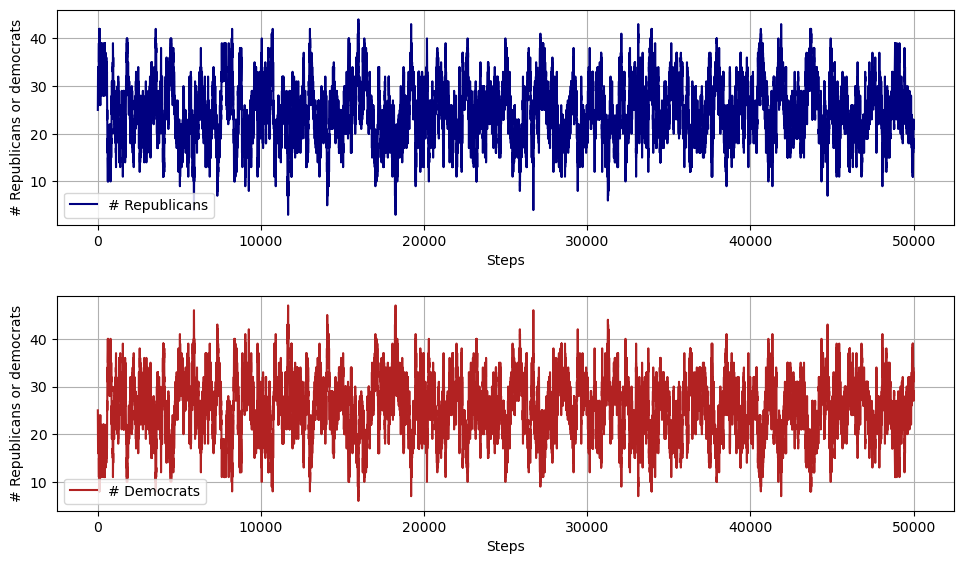

In [4]:
# (c)

r = 25 
d = 25
steps, r, d = gillespie_rd(r,d, 50000)

fig, ax = plt.subplots(2,1, figsize=(10,6), dpi=100)
ax[0].plot(steps, r, label='# Republicans', c='navy')
ax[1].plot(steps, d, label='# Democrats', c='firebrick')

for i in range(2):
    ax[i].set(xlabel = 'Steps', ylabel = '# Republicans or democrats')
    ax[i].legend(loc = 'lower left')
    ax[i].grid()
    
fig.tight_layout(pad=2.0)


The plot above seems to match the given scenario well, and the most important thing is, that the two plots are symmetric: meaning that when the number of democrats increase, the number of republicans decrease accordingly. It is also clear, that the the there is some fluctuation from the mean value of party members (25 memebers) but the given the algorithm we observe the at system is self regulating as we expected.

In [5]:
# (d)

@numba.njit
def gillespie_rdu(r, d, u, max_steps):
    step = 0
    d_list = [d]
    r_list = [r]
    u_list = [u]
    
    while step < max_steps:
        
        # Random rates
        d_rand_u = 0.1 * d
        r_rand_u = 0.1 * r
        u_rand_d = 0.05 * u
        u_rand_r = 0.05 * u
        
        # Convincing rates
        d_con_u = 0.01 * d * r 
        u_con_r = 0.01 * u * r
        r_con_u = 0.01 * d * r
        u_con_d = 0.01 * u * d
        
        
        rates = np.array([d_rand_u, 
                          r_rand_u, 
                          u_rand_d, 
                          u_rand_r, 
                          d_con_u, 
                          u_con_r, 
                          r_con_u,
                          u_con_d
                         ])
        
        r_sum = np.cumsum(rates)
        R = np.sum(rates)
        
        rand = np.random.uniform(0, R)
        mask = r_sum > rand
        index = np.where(mask==True)[0][0]
        
        
        if index == 0:
            u += 1
            d -= 1
        elif index == 1:
            u += 1
            r -= 1
        elif index == 2:
            d += 1
            u -= 1
        elif index == 3:
            r += 1
            u -= 1
        elif index == 4:
            u += 1
            d -= 1
        elif index == 5:
            r += 1
            u -= 1
        elif index == 6:
            u += 1
            r -= 1
        elif index == 7:
            d += 1
            u -= 1
        
        step += 1
        
        
        u_list.append(u)
        d_list.append(d)
        r_list.append(r)
    
    steps = np.arange(0, step + 1, 1)
    
    return steps, u_list, d_list, r_list

        

In [8]:
# (d) continued

# Initializing the system with the given values:
r = 0 
d = 0
u = 50
steps, u_list, r_list, d_list = gillespie_rdu(r, d, u, 500000)


# Checking that the total sum of republicans, democrats and undecided doesn't exceed 50
slum = np.array([u_list, r_list, d_list])
slum = np.sum(slum, axis = 0)
print(slum.max(), slum.min())

50 50


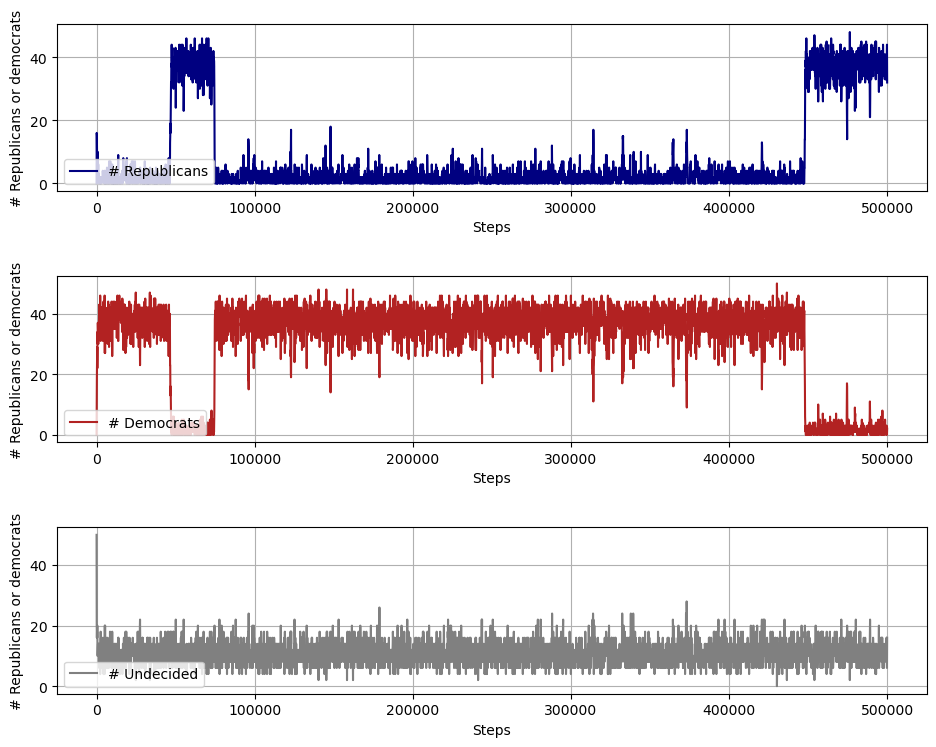

In [9]:
# (e)

# Plotting

fig, ax = plt.subplots(3,1, figsize=(10,8), dpi=100)
ax[0].plot(steps[::100], r_list[::100], label='# Republicans', c='navy')
ax[1].plot(steps[::100], d_list[::100], label='# Democrats', c='firebrick')
ax[2].plot(steps[::100], u_list[::100], label='# Undecided', c='grey')
for i in range(3):
    ax[i].set(xlabel ='Steps', ylabel='# Republicans or democrats')
    ax[i].legend(loc='lower left')
    ax[i].grid()

fig.tight_layout(pad=3.0)


Given the boundary conditions, it makes sense, that the systems tends towards one of the sides. As it begins, there are neither republicans nor democrats, but as soon as one from undecided becomes either, they can start to convince other undecided voters to change to their side. This on makes it a lot more rare, to get a voter in the other camp, whereas it is now far mor likely to get more voters in the first camp. The point where it is able to switch comepletely, is where there is enough undecided people to randomly convert to the unfavored side, and then start the snowball in the other direction.

___

# 5.4

In [11]:
# (a)
@numba.njit
def create_s(N):
    s = 2*np.random.randint(0, 2, size=(N,N)) - 1
    return s

@numba.njit
def hamilton(s):
    spin = s
    N = spin.shape[0]                        
    e = 0
    for k in range(N):
        for l in range(N):
            e -= (spin[k, l] * spin[(k + 1) % N, l] + 
                  spin[k, l] * spin[k, (l + 1) % N]) 
    return e

# Testing my results with a N=10 matrix for 100 runs
e_list = []
for _ in range(100):
    s = create_s(5)
    e = hamilton(s)
    e_list.append(e)
    
print(max(e_list), min(e_list)) 

# The energy for both all spin up and all spin down is 2*(N**2) so in this case 200


22 -14


In [13]:
# (b)
@numba.njit
def mag(s):
    return np.mean(s)

# The magnetisation of spin-matrix S(N = 10) 
s = create_s(10)
print(mag(s))

-0.02


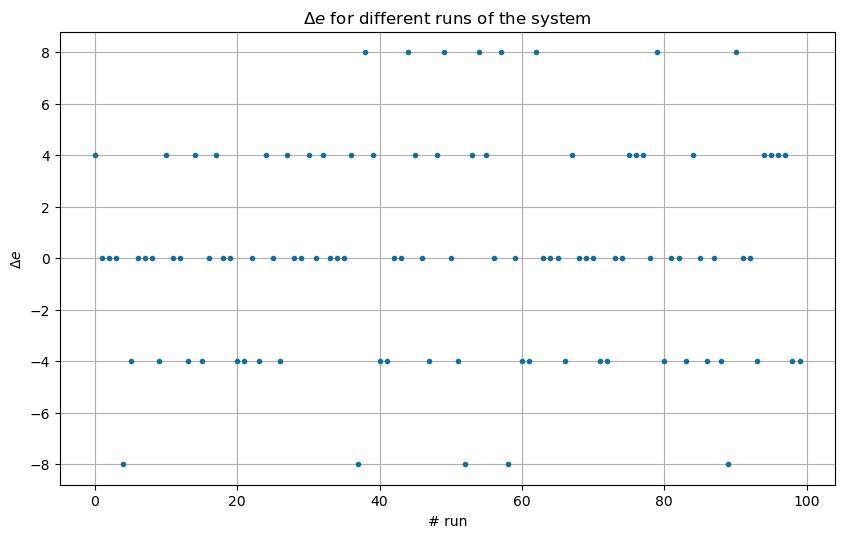

In [14]:
# (c)
@numba.njit
def dE(s, i, j):
    s_init = s ; e_init = hamilton(s_init)
    s_fin = s_init.copy()
    s_fin[i,j] = -s_fin[i,j]
    e_fin = hamilton(s_fin)
    
    return (e_fin - e_init), s_fin


# Testing my de for N = 10 in 100 runs
de_list = []
N = 10
for _ in range(100):
    i = np.random.randint(0,N) ; j = np.random.randint(0,N)
    delta_e, s_sfin = dE(create_s(N), i, j)
    de_list.append(delta_e)
    
plt.figure(figsize=(10,6), dpi = 100)    
plt.plot(de_list,'.')
plt.xlabel('# run')
plt.ylabel(r'$\Delta e$');
plt.title(r'$\Delta e$ for different runs of the system')
plt.grid()

In [15]:
# (d)

@numba.njit
def flip_accept(s, T = 1):
    s_init = s
    i = np.random.randint(0,len(s_init)); j = np.random.randint(0,len(s_init))
    delta_e, s_flipped = dE(s_init, i, j)
    
    alpha = min(1, np.exp(-delta_e/T))
    
    rand = np.random.uniform(0, 1)
    if alpha > rand:
        return s_flipped
    else:
        return s_init
    

In [16]:
%%time

# (e)

@numba.njit
def sim(N):
    tmax = 1000*(N**2)
    s = create_s(N)
    s_list = [s]
    t = 0
    while t < tmax:
        s = flip_accept(s.copy(), T=1)
        t += 1
        if t % 1000 == 0:
            s_list.append(s)
            

    return s_list

s_list = sim(40)


CPU times: user 33.6 s, sys: 300 ms, total: 33.9 s
Wall time: 35.8 s


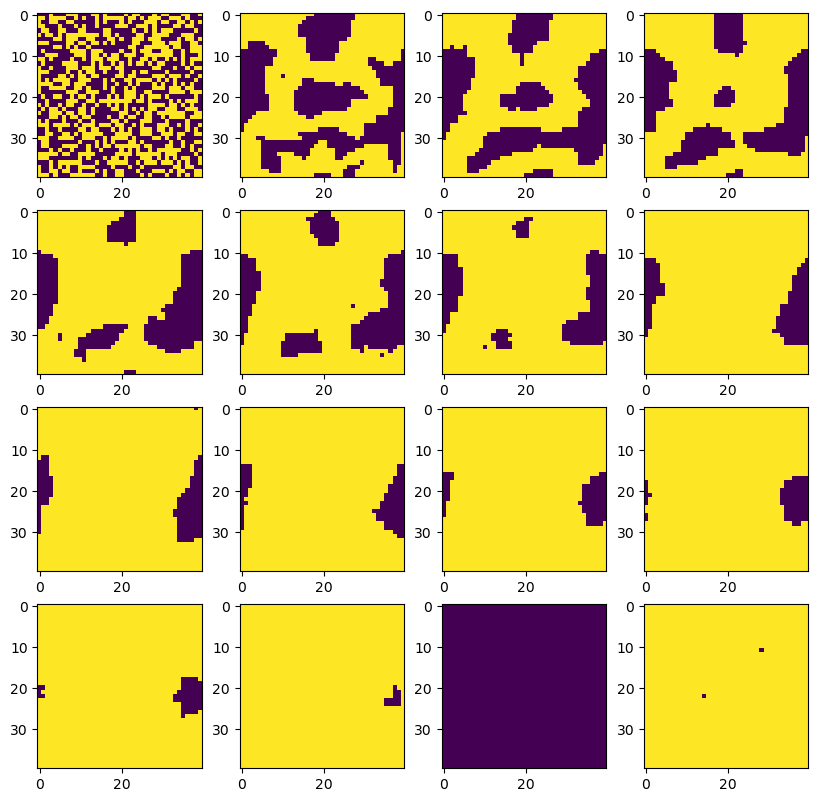

In [17]:
fig, ax = plt.subplots(4,4, figsize=(10,10), dpi = 100)
ax = ax.flatten()



plotable = s_list[::15]
for i in range(len(ax)):
    ax[i].imshow(plotable[i], interpolation='nearest')

As my code above is very slow, i couldn't make it run for more than $N = 40$ which isn't very close to $N = 1000$. I will say though, that i think the results in the plots above says something too. Lookin at the maximum value (or minimum - ie. all the spins pointing up or down) of $H$ which for $N = 40$ is $-2 \cdot 40^2 = -3200$  we see that this is the most probable spin state for the system given equaition (5.7). This tendendy is also what we see in the plots above, where all the spins switch to spin down or $s = -1$. The small dots are some spins changing, which isn't impossible, just very unlikely :) 